In [2]:
# Importação das bibliotecas para analise e manipluação de dados

import pandas as pd                                                # Analise e tratamento de dados
import numpy as np                                                 # Tratamento de dados numéricos
import random                                                      # Gerador de números aleatórios
import matplotlib.pyplot as plt                                    # Plotagem de gráficos
import seaborn as sns                                              # Plotagem de gráficos
import math                                                        # Operações matemáticas
from apyori import apriori                                         # Algoritmo de apriori( regras de associação )

In [3]:
# criação dos dados

dados = np.array([160, 165, 167, 164, 160, 166, 160, 161, 150, 152, 173, 160, 155,
                  164, 168, 162, 161, 168, 163, 156, 155, 169, 151, 170, 164,
                  155, 152, 163, 160, 155, 157, 156, 158, 158, 161, 154, 161, 156, 172, 153])

In [4]:
# ordenação dos dados

dados = np.sort(dados)

In [5]:
# visualização dos valores minimos e máximo

print('valor mínimo: ', dados.min(),'\nvalor máximo: ', dados.max())

valor mínimo:  150 
valor máximo:  173


In [6]:
# quantidade por valor

np.unique(dados, return_counts=True)

(array([150, 151, 152, 153, 154, 155, 156, 157, 158, 160, 161, 162, 163,
        164, 165, 166, 167, 168, 169, 170, 172, 173]),
 array([1, 1, 2, 1, 1, 4, 3, 1, 2, 5, 4, 1, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1],
       dtype=int64))

In [7]:
dados

array([150, 151, 152, 152, 153, 154, 155, 155, 155, 155, 156, 156, 156,
       157, 158, 158, 160, 160, 160, 160, 160, 161, 161, 161, 161, 162,
       163, 163, 164, 164, 164, 165, 166, 167, 168, 168, 169, 170, 172,
       173])

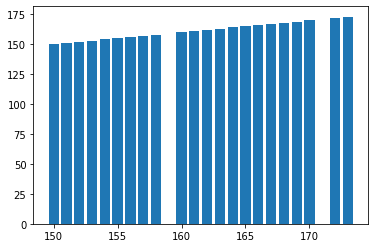

In [8]:
plt.bar(dados, dados);

In [9]:
# definição das classes

n = len(dados)                         # quantidade de dados
i = 1 + 3.3 * np.log10(n)              # quantidade de classes pela formula de Sturges
i

6.286797971382275

In [10]:
# valor arredondado para quantidade de classes

i = round(i)                     # arredondamento
i

6

In [11]:
# amplitude do intervalo
# h = AA / i
# AA = dados.max() - dados.min()

# aplicação da formula para amplitude do intervalo
AA = dados.max() - dados.min()
h = AA / i
h

h = math.ceil(h)                                       # arredondamento sempre para cima
h

4

In [12]:
# contrução da tabela de frequência

intervalos = np.arange(dados.min(), dados.max() + 2, step = h)  # metodo 'np.arange' cria as classes 
intervalos

array([150, 154, 158, 162, 166, 170, 174])

In [13]:
# criando as classes manualmente

# definição dos intervalos e atribuindo o valor 0 a todos
intervalo1, intervalo2, intervalo3, intervalo4, intervalo5, intervalo6 = 0,0,0,0,0,0

# interação nos dados para colocar os valores nas classes
for i in range(n):
  if dados[i] >= intervalos[0] and dados[i] < intervalos[1]:
    intervalo1 += 1

  elif dados[i] >= intervalos[1] and dados[i] < intervalos[2]:
    intervalo2 += 1

  elif dados[i] >= intervalos[2] and dados[i] < intervalos[3]:
    intervalo3 += 1

  elif dados[i] >= intervalos[3] and dados[i] < intervalos[4]:
    intervalo4 += 1

  elif dados[i] >= intervalos[4] and dados[i] < intervalos[5]:
    intervalo5 += 1

  elif dados[i] >= intervalos[5] and dados[i] < intervalos[6]:
    intervalo6 += 1


In [14]:
# lista com a quantidade de dados por classe
lista_intervalos = []

# adicionando os valores nas classes
lista_intervalos.append(intervalo1)
lista_intervalos.append(intervalo2)
lista_intervalos.append(intervalo3)
lista_intervalos.append(intervalo4)
lista_intervalos.append(intervalo5)
lista_intervalos.append(intervalo6)

# quantidade de elementos por classe
lista_intervalos

[5, 9, 11, 7, 5, 3]

In [15]:
# lista com os valores da lista de intervalos
lista_classes = []                                                       # quantidades de elementos por classe

for i in range(len(lista_intervalos)):
  lista_classes.append(str(intervalos[i]) + '-' + str(intervalos[i+1]))

In [16]:
# visualização da tabela de frequência

lista_classes                                               # classes

['150-154', '154-158', '158-162', '162-166', '166-170', '170-174']

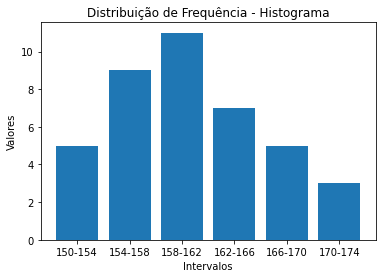

In [17]:
# visualização da tabela de frequência

plt.bar(lista_classes, lista_intervalos)
plt.title('Distribuição de Frequência - Histograma')
plt.xlabel('Intervalos')
plt.ylabel('Valores')
plt.show()

In [18]:
# criação da lista de valores

dados = np.array([160, 165, 167, 164, 160, 166, 160, 161, 150, 152, 173, 160, 155,
                  164, 168, 162, 161, 168, 163, 156, 155, 169, 151, 170, 164,
                  155, 152, 163, 160, 155, 157, 156, 158, 158, 161, 154, 161, 156, 172, 153])

In [19]:
# uso do metodo np.histogram para criar a distribuição de frequência

frequencia, classes = np.histogram(dados)

In [20]:
# visualização dos dados após a distribuição de frequência

frequencia, classes, len(classes)

(array([4, 2, 7, 3, 9, 3, 5, 3, 2, 2], dtype=int64),
 array([150. , 152.3, 154.6, 156.9, 159.2, 161.5, 163.8, 166.1, 168.4,
        170.7, 173. ]),
 11)

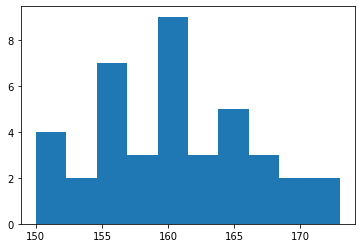

In [21]:
# visualização da distribuição de frequência graficamente

plt.hist(dados, bins=classes);

In [22]:
# alteração da quantidade de classes com o parametro 'bins'

frequencia, classes = np.histogram(dados, bins=5)

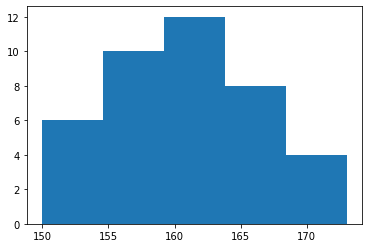

In [23]:
# visualização dos dados graficamente após a mudança do tamanho das classes

plt.hist(dados, classes);

In [24]:
# alteração da quantidade de classes com o parametro 'bins' usando a formula de Sturges
frequencia, classes = np.histogram(dados, bins='sturges')

# visualização dos dados
frequencia, classes

(array([ 5,  8,  3, 12,  5,  4,  3], dtype=int64),
 array([150.        , 153.28571429, 156.57142857, 159.85714286,
        163.14285714, 166.42857143, 169.71428571, 173.        ]))

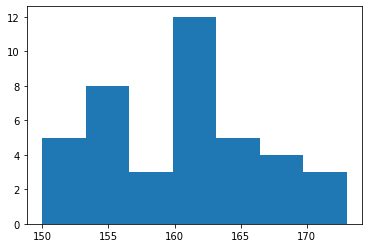

In [25]:
# visualização dos dados graficamente após a mudança do tamanho das classes usando a formula de Sturges

plt.hist(dados, classes);

In [26]:
# verificação do tipo 

type(dados)

numpy.ndarray

In [27]:
# trasnformação de array para dataframe

dados = pd.DataFrame({'dados': dados})

In [28]:
# visualização dos primeiros registros

dados.head()

,dados
0,160
1,165
2,167
3,164
4,160


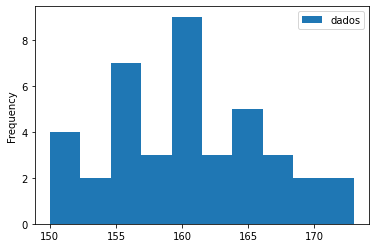

In [29]:
# visualização graficamente dos registos em um histograma

dados.plot.hist();

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


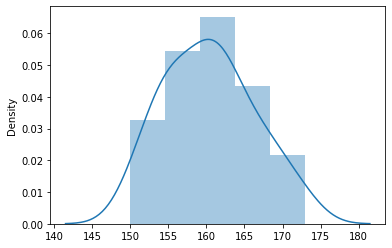

In [30]:
# uso da biblioteca seaborn para visualização graficamente dos registos em um histograma

sns.distplot(dados, hist = True, kde = True);                   # hist ( histogram ), kde ( kernel density estimation )

In [31]:
# Algortimo 'APRIORI' usado em regras de associação

In [32]:
# Carregamento da base de dados em uma variável

dados2 = pd.read_csv('../data/census.csv')
# 'census.csv' é um arquivo com alguns dados do census dos estados unidos

In [33]:
# visualização dos primeiros registros

dados2.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [34]:
# criação das distribuição das classes de idade

dados2['age'] = pd.cut(dados2['age'], bins=[0, 17, 25, 40, 60, 90], 
                        labels=['Faixa1', "Faixa2", "Faixa3", "Faixa4", "Faixa5"])

In [35]:
dados2.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,Faixa3,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Faixa4,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Faixa3,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Faixa4,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Faixa3,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [36]:
# visualização dos registros unicos da variavel 'age'

dados2['age'].unique()

['Faixa3', 'Faixa4', 'Faixa2', 'Faixa5', 'Faixa1']
Categories (5, object): ['Faixa1' < 'Faixa2' < 'Faixa3' < 'Faixa4' < 'Faixa5']

In [37]:
# criação de um novo dataframe com os dados categoricos para aplicação do algoritmo apriori

dados_apriori = dados2[['age', 'workclass', 'education', 'marital-status', 
                        'relationship', 'occupation', 'sex', 'native-country', 
                        'income']]

In [38]:
dados_apriori.head()

,age,workclass,education,marital-status,relationship,occupation,sex,native-country,income
0,Faixa3,State-gov,Bachelors,Never-married,Not-in-family,Adm-clerical,Male,United-States,<=50K
1,Faixa4,Self-emp-not-inc,Bachelors,Married-civ-spouse,Husband,Exec-managerial,Male,United-States,<=50K
2,Faixa3,Private,HS-grad,Divorced,Not-in-family,Handlers-cleaners,Male,United-States,<=50K
3,Faixa4,Private,11th,Married-civ-spouse,Husband,Handlers-cleaners,Male,United-States,<=50K
4,Faixa3,Private,Bachelors,Married-civ-spouse,Wife,Prof-specialty,Female,Cuba,<=50K


In [39]:
# visualização do tamanho da base de dados

dados_apriori.shape

(32561, 9)

In [40]:
# pegando uma amostra da base completa para aplicação do algoritmo apriori e testes
dados_apriori = dados_apriori.sample( n = 1000 )

# visualização do tamnho da amostra
dados_apriori.shape

(1000, 9)

In [41]:
# transformação da base de dados para um formato de lista onde será aplicado o algoritmo

transacoes = []
for i in range(dados_apriori.shape[0]):
    transacoes.append([str(dados_apriori.values[i, j]) for j in range(dados_apriori.shape[1])])

In [42]:
# verificação do tamanho da lista com os dados

len(transacoes)

1000

In [43]:
# verificação dos dados contidos na lista, 2 primeiros registros

transacoes[ : 2]

[['Faixa4',
  ' Self-emp-not-inc',
  ' Prof-school',
  ' Never-married',
  ' Not-in-family',
  ' Prof-specialty',
  ' Male',
  ' United-States',
  ' >50K'],
 ['Faixa4',
  ' Private',
  ' HS-grad',
  ' Married-civ-spouse',
  ' Wife',
  ' Other-service',
  ' Female',
  ' Philippines',
  ' <=50K']]

In [44]:
# uso do algoritmo apriori com o parametro 'min_support' (suporte mínimo), 'min_confidence' (confiança mínima)
regras = apriori(transacoes, min_support = 0.3, min_confidence = 0.2)

# atribuição da lista de regras para uma variável( resultados )
resultados = list(regras)

In [46]:
# tamanho da lista de regras

len(resultados)

38

In [48]:
# visualização das regras geradas pelo algoritmo apriori, 2 primeiros registros

resultados[ : 2]

[RelationRecord(items=frozenset({' <=50K'}), support=0.767, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' <=50K'}), confidence=0.767, lift=1.0)]),
 RelationRecord(items=frozenset({' Female'}), support=0.339, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' Female'}), confidence=0.339, lift=1.0)])]